# **Tratamiento de casos completos**


Tratamiento de casos completos (CCA por sus siglas en inglés - Complete-case analysis), también conocido como "eliminación por lista", consiste en solamente incluir en el análisis los casos que presentan valores en **todas** las variables. En otras palabras, se descartan las observaciones, donde falta alguno de los datos para alguna de las variables. Por ejemplo en el siguiente DataFrame

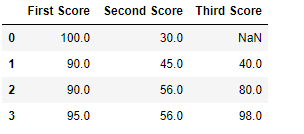

## **Cuáles variables se pueden imputar con CCA?**

CCA puede ser aplicado ya sea a variables categóricas o numéricas


### Condiciones

Este método **solo** debe utilizarse cuando los datos faltan al azar (MCAR), porque en otro caso introduce sesgo. Cuando los datos faltan al azar, eliminar observaciones con información faltante es lo mismo que aleatoriamente excluir algunas observaciones de los datos. Por lo tanto, solo bajo estas condiciones, después de usar CCA, la muestra es una representación justa de los datos originales. Por ejemplo.
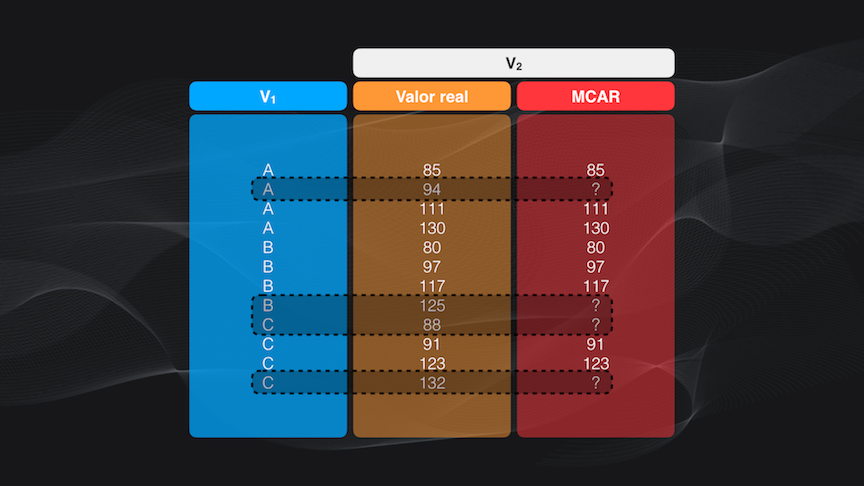

Da


### Ventajas

- Fácil de implementar
- No se requiere manipulación de los datos
- Mantiene la distribución de las variables

### Desventajas

- El set de datos puede reducirse dramáticamente si hay muchos datos faltantes afectando la representatividad de la muestra.
- Las observaciones excluidas pueden contener información importante para el análisis (si los datos no faltan al azar)
- Cuando usamos los modelos en producción, el modelo no sabrá cómo manejar los datos faltantes

### Entonces, cuando usar CCA?

- Cuando los datos faltan de forma completamente aleatoria
- Cuando solo el menor o igual al 5% de los datos contienen observaciones incompletas (con datos faltantes)

En la práctica, CCA puede ser un método aceptable si la cantidad de datos faltantes es baja.
Desafortunadamente, no hay una regla clara para determinar cuán baja es baja. Sin embargo, en general, no más del 5% de las observaciones deberían presentar datos faltantes en la muestra original.

En la práctica, en la mayoría de los caos, la cantidad de observaciones con datos faltantes es alta, y por lo tanto CCA no es una opción.

### CCA y los modelos en producción


Cuando se usa CCA, se eliminan las observaciones que tienen datos faltantes durante el entrenamiento del modelo. Sin embargo, los datos reales usados para evaluar el modelo, pueden tener datos faltantes. Esto causa problemas en los sistemas «online», ya que el modelo no sabrá cómo manejar estos casos (ya que no se ha introducido ninguna técnica para manejar datos faltantes, solo se los ha removido).

Para evitar este problema, cuando se pone un modelo en producción necesitamos hacer 1 de 2 cosas:

    1)	no se hace scoring con datos faltantes
    2)	reemplazamos los valores faltantes con otro número.

Podemos escoger cualquiera de las técnicas de imputación que discutiremos en las siguientes clases para reemplazar estos datos faltantes en producción.

## En este demo:

Usaremos los datos de House Prices para demostrar cómo usar Tratamiento de casos completos - CCA.




In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Mostrar todas las columnas presentes en los datos
pd.set_option('display.max_columns', None)

In [ ]:
data=pd.read_csv('https://github.com/pudo/dataset/tree/master/dataset')
data

ParserError: ignored

In [ ]:
# visualicemos los 5 primeros registros de los datos
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          91 non-null     object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# variables con valores faltantes

vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
# Miremos si las variables son categóricas o numéricas
data[vars_with_na].dtypes

Alley           object
MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
FireplaceQu     object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
PoolQC          object
Fence           object
MiscFeature     object
dtype: object

In [ ]:
# Variables con valores faltantes o NA

data[vars_with_na].head(10)

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
5,NaN,None,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,Unf,TA,TA,NaN,MnPrv,Shed
6,NaN,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,NaN,NaN
7,NaN,Stone,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,Shed
8,NaN,None,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,Unf,Fa,TA,NaN,NaN,NaN
9,NaN,None,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,RFn,Gd,TA,NaN,NaN,NaN


In [ ]:
# Porcentaje de observaciones con valores faltantes

# Calculemos el porcentaje de valores faltantes
# usando los métodos isnull() y mean() de pandas
data_na = data[vars_with_na].isnull().mean()

# transformar array en dataframe
data_na = pd.DataFrame(data_na.reset_index())

# anadir columnas en el dataframe
data_na.columns = ['variable', 'na_percentage']

# ordenar el dataframe de acuerdo al porcetage de na por variable
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# mostrar
data_na

,variable,na_percentage
13,PoolQC,0.995205
15,MiscFeature,0.963014
0,Alley,0.937671
14,Fence,0.807534
8,FireplaceQu,0.472603
9,GarageType,0.055479
10,GarageFinish,0.055479
11,GarageQual,0.055479
12,GarageCond,0.055479
4,BsmtExposure,0.026027


Las primera variable tiene un gran porcentaje de información faltante. Por lo tanto, no es recomendable usar CCA para estas variables, ya que descartaríamos la mayoría de los datos. Sin embargo, podemos usar CCA si omitimos estas variables y consideramos solo las restantes en el set de datos.

Para este demo, ignoraremos las primeras  variables, y procederemos con CCA para las variables restantes.


In [ ]:
# capturemos las variables con menos de 5% de valores faltantes NA

vars_cca = [var for var in data.columns if data[var].isnull().mean() < 0.05]
vars_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 '

In [ ]:
# el método dropna(), descarta las observaciones que contienen
# na en cualquiera de las filas / columnas

len(data[vars_cca].dropna()) / len(data)

0.9671232876712329

In [ ]:
# Descartemos observaciones con na en cualquiera de las variables

data_cca = data[vars_cca].dropna()
data.shape, data_cca.shape

((1460, 81), (1412, 72))

Hemos removido observaciones del set de datos original.

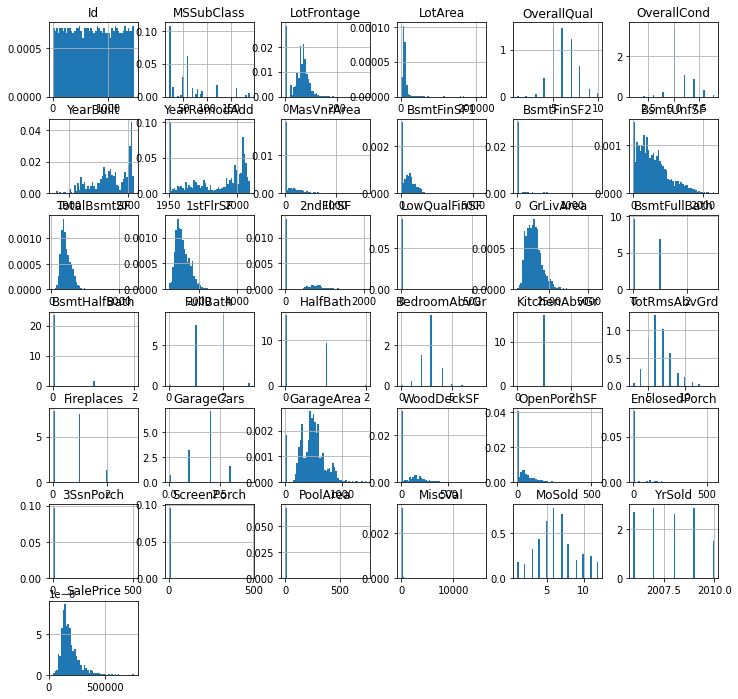

In [ ]:
# grafiquemos histogramas para todas las variables numéricas
# para el dataframe data_cca

data_cca.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

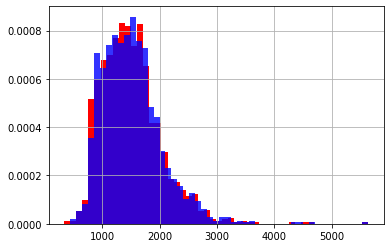

In [ ]:
## Miremos la distribución de unas variables antes y después de cca
## histograma

fig = plt.figure()
ax = fig.add_subplot(111)

# datos originales
data['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

# datos después de cca, el argumento alpha hace el color 'transparente'
# así podemos sobreponer las dos distribuciones
data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

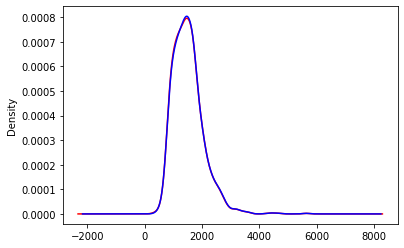

In [ ]:
## miremos la distribución de unas variables antes y depués de cca
# density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# datos originales
data['GrLivArea'].plot.density(color='red')

# datos después de cca
data_cca['GrLivArea'].plot.density(color='blue')

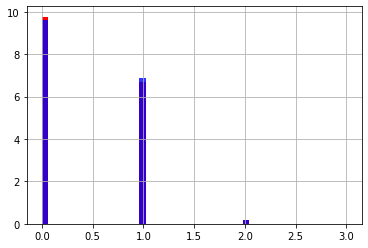

In [ ]:
## Miremos la distribución de unas variables antes y después de cca
## histograma

fig = plt.figure()
ax = fig.add_subplot(111)

# datos originales
data['BsmtFullBath'].hist(bins=50, ax=ax, density=True, color='red')

# datos después de cca, el argumento alpha hace el color 'transparente'
# así podemos sobreponer las dos distribuciones

data_cca['BsmtFullBath'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

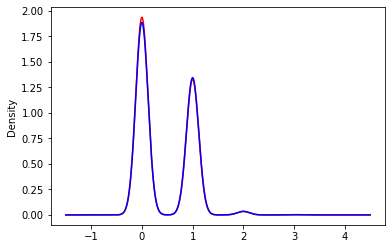

In [ ]:
## miremos distribución de unas variables antes y depués de cca
# density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# set de datos original
data['BsmtFullBath'].plot.density(color='red')

# data depués cca
data_cca['BsmtFullBath'].plot.density(color='blue')

Podemos ver de las gráficas anteriores, que la distribución de las variables numéricas seleccionadas en los datos originales y después de cca, son muy similares, que es lo que esperamos con CCA si los datos faltan al azar y solo en una pequeña proporción de las observaciones.

En las siguientes celdas, vamos a explorar la distribución de las variables categóricas.  Evaluaremos el porcentaje de observaciones por cada categoría.


In [ ]:
# la siguiente función captura el porcentaje de observaciones
# por cada categoría en los datos originales y los datos después de cca
# y los pone en un nuevo dataframe


def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentaje de observaciones por categoría, datos originales
            df[variable].value_counts() / len(df),

            # percentaje de observaciones por categoría, datos después de cca
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # re-nombrar columnas
    tmp.columns = ['original', 'cca']

    return tmp

In [ ]:
# correr la función para una de las variables categóricas
categorical_distribution(data, data_cca, 'LotArea')

,original,cca
1300,0.000685,0.000708
1477,0.000685,0.000708
1491,0.000685,0.000708
1526,0.000685,0.000708
1533,0.001370,0.001416
...,...,...
70761,0.000685,0.000708
115149,0.000685,0.000708
159000,0.000685,0.000708
164660,0.000685,0.000708


In [ ]:
categorical_distribution(data, data_cca, 'Electrical')

,original,cca
SBrkr,0.913699,0.920680
FuseA,0.064384,0.062323
FuseF,0.018493,0.014873
FuseP,0.002055,0.001416
Mix,0.000685,0.000708


Podemos ver que la distribución en cada una de las categorías es muy similar en los datos originales y después de cca. Una vez más, es lo que esperamos con CCA si los datos faltan al azar y solo en una pequeña proporción de las observaciones.
